In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"prakharshukla1","key":"bd9775d04fb22266e350ecf0b27475d1"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d  shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
df1=pd.read_csv("ptbdb_abnormal.csv",header=None)
df2=pd.read_csv("ptbdb_normal.csv",header=None)

df=pd.concat([df1,df2],ignore_index=True)
(df.head())

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
ls=[i+1 for i in range(len(df))]
df=df.sample(frac=1)
df_final = df
# df=
df_final.insert(0,"id",ls)
df_final.drop(columns=187,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_tr,X_ts=train_test_split(df_final,random_state=1,test_size=0.25)

In [ ]:
X_tr.head()

,id,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,186
8130,3649,0.914020,0.953998,0.621577,0.435926,0.352136,0.285323,0.319277,0.349945,0.307777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
788,2985,0.939445,0.571909,0.082843,0.000000,0.066863,0.058032,0.010093,0.033221,0.021026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,10370,1.000000,0.785432,0.368963,0.219319,0.195566,0.285827,0.326207,0.302454,0.329374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12908,5990,1.000000,0.836694,0.352823,0.150538,0.069220,0.126344,0.117608,0.122312,0.114919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4803,13359,0.995017,0.702104,0.160576,0.006645,0.058693,0.038206,0.037099,0.038760,0.060908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_ts.head()

,id,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,186
10187,5489,1.000000,0.697294,0.400789,0.179820,0.000000,0.197858,0.184893,0.249154,0.250282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,4117,0.898175,0.467819,0.291066,0.209414,0.124400,0.057637,0.045149,0.044188,0.022574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14253,4779,0.911324,0.552427,0.118035,0.000000,0.079089,0.140803,0.201318,0.196525,0.207909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11147,5399,1.000000,0.394823,0.000000,0.045604,0.095316,0.110929,0.104355,0.096960,0.089154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,10109,1.000000,0.974940,0.738663,0.758950,0.449881,0.336516,0.381862,0.344869,0.318616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_ts.iloc[0]

id     5489.000000
0         1.000000
1         0.642424
2         0.000000
3         0.233939
          ...     
182       0.000000
183       0.000000
184       0.000000
185       0.000000
186       0.000000
Name: 8159, Length: 188, dtype: float64

In [ ]:
df_final.head()

,id,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,186
13043,1,1.000000,0.271019,0.027243,0.000000,0.013152,0.123532,0.153124,0.154533,0.160639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12557,2,1.000000,0.499744,0.135177,0.000000,0.029186,0.163338,0.194060,0.203789,0.232975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2902,3,0.940244,0.997561,0.503659,0.117073,0.116463,0.155488,0.203659,0.230488,0.250610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2686,4,0.969914,0.919054,0.803009,0.660458,0.395415,0.143266,0.074499,0.000000,0.148997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6608,5,0.995416,1.000000,0.834989,0.741024,0.608862,0.508021,0.445378,0.398014,0.330023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_tr.to_csv("train.csv",index=False)
X_ts.to_csv("test.csv",index=False)

In [ ]:
df["id"]

13043        1
12557        2
2902         3
2686         4
6608         5
         ...  
9348     14548
1769     14549
982      14550
12735    14551
158      14552
Name: id, Length: 14552, dtype: int64

In [ ]:
!mkdir train
!mkdir test
X_train = []
y_train = []

for i in range(X_tr.shape[0]):
  y_train.append(X_tr.iloc[i][:X_tr.shape[1]-1].tolist())
  plt.rcParams["figure.autolayout"] = True
  im = plt.imread("graph.png")
  fig, ax = plt.subplots()
  nn=len(X_tr.iloc[i][1:X_tr.shape[1]])
  im = ax.imshow(im, extent=[0, nn, 0, nn])
  ax.axis('off')
  x = np.array(range(nn))
  ax.plot(x,np.array(X_tr.iloc[i][1:X_tr.shape[1]])*nn)
  title=f"/content/train/{X_tr.iloc[i]['id']}.png"
  plt.savefig(title,transparent=False)

  plt.clf()
  image = cv2.imread(title)
  image = cv2.resize(image, dsize=(128,128))
  image = image.astype('float32') / 255.0

  X_train.append(image)

print("-"*50)
X_test = []
y_test = []
for i in range(X_ts.shape[0]):
  y_test.append(X_ts.iloc[i][:X_ts.shape[1]-1].tolist())
  plt.rcParams["figure.autolayout"] = True
  im = plt.imread("graph.png")
  fig, ax = plt.subplots()
  nn=len(X_ts.iloc[i][:X_ts.shape[1]-1])
  im = ax.imshow(im, extent=[0, nn, 0, nn])
  ax.axis('off');
  x = np.array(range(nn))
  ax.plot(x,X_ts.iloc[i][:X_ts.shape[1]-1]*nn)
  title=f"/content/test/{X_ts.iloc[i]['id']}.png"
  plt.savefig(title,transparent=False)
  plt.clf()
  image = cv2.imread(title)
  image = cv2.resize(image, dsize=(128,128))
  image = image.astype('float32') / 255.0

  X_test.append(image)


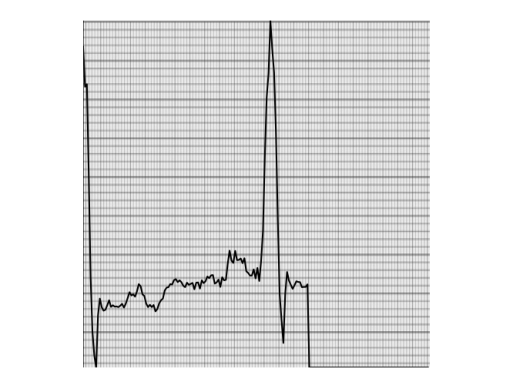

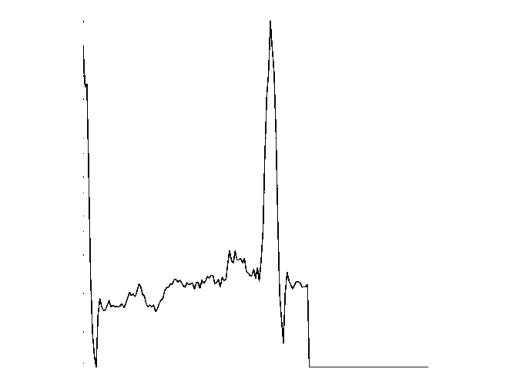

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Convert ECG Image to Binary Image

# Load the ECG image
ecg_image = cv2.imread('/content/train/10056.0.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(ecg_image, cmap='gray')
# plt.title('Original ECG Image')
plt.axis('off')
plt.show()

# Convert the image to binary
_, binary_image = cv2.threshold(ecg_image, 127, 255, cv2.THRESH_BINARY)
# Display the binary image
plt.imshow(binary_image, cmap='gray')
# plt.title('Binary ECG Image')
plt.axis('off')
plt.show()

# Step 2: Sample Amplitude Values


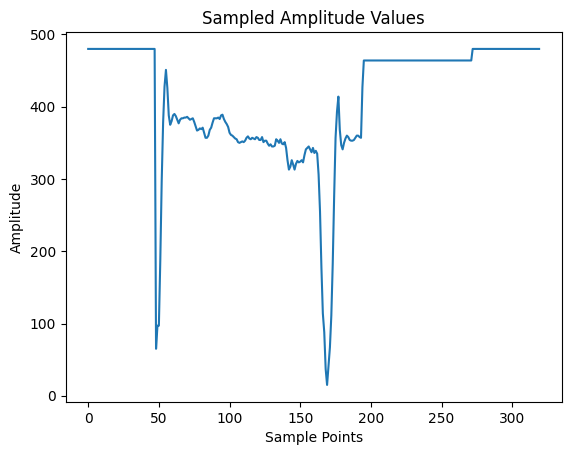

223


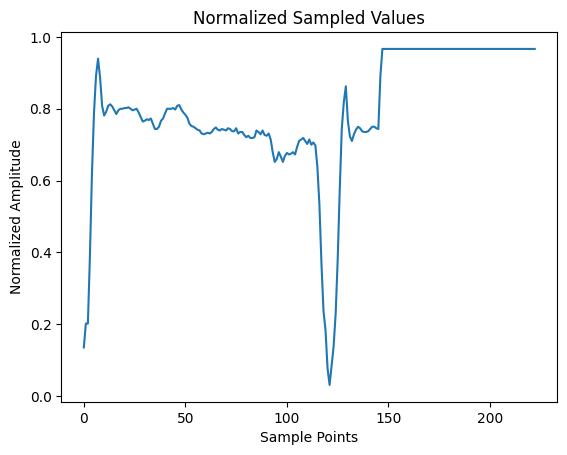

In [ ]:

# Define vertical resolution
H = binary_image.shape[0]

# Define sampling interval (S)
S = 2

# Extract amplitude values at regular intervals
sampled_values = []
for x in range(0, binary_image.shape[1], S):
    # Find the first black pixel from the top in the current column
    column = binary_image[:, x]
    h = np.argmax(column == 0)  # Distance from the top
    if h == 0 and column[0] != 0:  # No black pixel found
        h = H
    sampled_values.append(h)

# Convert sampled values to a numpy array
sampled_values = np.array(sampled_values)

# Display sampled values
plt.plot(sampled_values)
plt.title('Sampled Amplitude Values')
plt.xlabel('Sample Points')
plt.ylabel('Amplitude')
plt.show()

# Step 3: Normalize Sample Values

# Normalize the sampled values by H
normalized_values = sampled_values / H

l=0
r=len(normalized_values)-1
while(normalized_values[l]==1):
  l+=1
while(normalized_values[r]==1):
  r-=1


normalized_values=normalized_values[l:r]
print(len(normalized_values))
# Display normalized values
plt.plot(normalized_values)
plt.title('Normalized Sampled Values')
plt.xlabel('Sample Points')
plt.ylabel('Normalized Amplitude')
plt.show()



In [ ]:
def preprocess_image(image_path):
  ecg_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # Convert the image to binary
  _, binary_image = cv2.threshold(ecg_image, 127, 255, cv2.THRESH_BINARY)


  H = binary_image.shape[0]

  # Define sampling interval (S)
  S = 2

  # Extract amplitude values at regular intervals
  sampled_values = []
  for x in range(0, binary_image.shape[1], S):
      # Find the first black pixel from the top in the current column
      column = binary_image[:, x]
      h = np.argmax(column == 0)  # Distance from the top
      if h == 0 and column[0] != 0:  # No black pixel found
          h = H
      sampled_values.append(h)

  # Convert sampled values to a numpy array
  sampled_values = np.array(sampled_values)



  # Normalize the sampled values by H
  normalized_values = sampled_values / H

  l=0
  r=len(normalized_values)-1
  while(normalized_values[l]==1):
    l+=1
  while(normalized_values[r]==1):
    r-=1


  return (normalized_values[l:r])

In [ ]:
train_df=pd.read_csv("train.csv")
X_train_ls = []
y_train_ls = []

for image_id in os.listdir('/content/train'):
    image_path = os.path.join('/content/train', image_id)
    time_series = preprocess_image(image_path)
    X_train_ls.append(time_series)

    # Read the corresponding row from the CSV file
    df_row = train_df[train_df['id'] == int(image_id.split('.')[0])]
    y_train_ls.append(df_row.drop(columns='id').values.tolist()[0])



X_train=pd.DataFrame(X_train_ls, columns=range(len(X_train_ls[0])))
y_train=pd.DataFrame(y_train_ls, columns=range(len(y_train_ls[0])))


In [ ]:
test_df=pd.read_csv("test.csv")
X_test_ls = []
y_test_ls = []

for image_id in os.listdir('/content/test'):
    image_path = os.path.join('/content/test', image_id)
    time_series = preprocess_image(image_path)
    X_test_ls.append(time_series)

    # Read the corresponding row from the CSV file
    df_row = test_df[test_df['id'] == int(image_id.split('.')[0])]
    y_test_ls.append(df_row.drop(columns='id').values.tolist()[0])



X_test=pd.DataFrame(X_test_ls, columns=range(len(X_test_ls[0])))
y_test=pd.DataFrame(y_test_ls, columns=range(len(y_test_ls[0])))

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your dataframes and y_train and y_test are your labels
# Convert dataframes to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(187, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE: {mse}')

# Predict on the test set
predictions = model.predict(X_test)
print(predictions[:5])


In [ ]:
import shutil
shutil.rmtree("test")
shutil.rmtree("train")

In [ ]:
!zip '/content/train.zip' '/content/train/'
!zip '/content/test.zip' '/content/test/'

  adding: content/train/ (stored 0%)
  adding: content/test/ (stored 0%)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
split = 0.8
X_train = X_train_normal[ : int(len(X_train_normal)*split)] + X_train_abnormal[ : int(len(X_train_abnormal)*split)]
y_train = y_train_normal[ : int(len(y_train_normal)*split)] + y_train_abnormal[ : int(len(y_train_abnormal)*split)]

combined_list = list(zip(X_train, y_train))
random.shuffle(combined_list)
X_train, y_train = zip(*combined_list)
X_train = np.stack(list(X_train))
y_train = np.stack(list(y_train))

X_val = X_train_normal[int(len(X_train_normal)*split) : ]  +  X_train_abnormal[int(len(X_train_abnormal)*split) : ]
X_val = np.stack(X_val)
y_val = y_train_normal[int(len(y_train_normal)*split) : ]  +  y_train_abnormal[int(len(y_train_abnormal)*split) : ]
y_val = np.stack(y_val)

In [ ]:
print(X_train.shape), print(y_train.shape), print(X_val.shape), print(y_val.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape of your images
input_shape = (128, 128, 3)  # Specify your image dimensions and number of channels

# Define your CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(400, activation='relu'),
    Dense(187,activation = 'sigmoid')  # Output layer with 187 units for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Using Mean Squared Error as loss for regression

# Display model summary
model.summary()

In [ ]:
!zip -r /content/test.zip /content/test

In [ ]:
!zip -r /content/train.zip /content/train

In [ ]:
from google.colab import files
files.download("/content/train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/content/test.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
a = model.predict(X_val)

In [ ]:
for i in range(len(y_val[0])):
  print(a[0][i],y_val[0][i])


In [ ]:
df=df.T

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df1.shape,df2.shape,df.shape

In [ ]:
import os
import shutil

if os.path.exists("data_atindex"):
  shutil.rmtree("data_atindex")

if not os.path.exists("data_atindex"):
  os.makedirs("data_atindex")

for i in range(df.shape[0]):

  plt.scatter(df.columns,df.iloc[i],s=1)
  title=f"/content/data_atindex/{i}.png"
  plt.savefig(title,transparent=True)
  plt.clf()

In [ ]:
import shutil
# shutil.rmtree("data")
# shutil.rmtree("testing_data")
# shutil.rmtree("training_data")
shutil.rmtree("test")
shutil.rmtree("train")